In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [17]:
df=pd.read_csv('C:/Users/aiger/Desktop/MSFE/IE517/HW6/ccdefault.csv')

In [18]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
from sklearn.preprocessing import StandardScaler
stad=StandardScaler()
X= df.iloc[:, 1:24]
y=df[['DEFAULT']]

In [72]:
steps=[('imputer', KNNImputer(n_neighbors=2, weights='uniform')), #imputing clearing missing data
      ('scaler', StandardScaler()), #scaling
      ('decision_tree', DecisionTreeClassifier())] #Decision Tree
pipeline=Pipeline(steps)   

In [74]:
In=[] #List of In-sample scores
Out=[]#List of Out-sample scores
for i in range(1,11):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=i, stratify=y)
    pipeline.fit(X_train, y_train)
    y_pred_train= pipeline.predict(X_train)
    y_pred_test= pipeline.predict(X_test)
    
    In.append(accuracy_score(y_train, y_pred_train))
    Out.append(accuracy_score(y_test, y_pred_test))  
#Results
print([float('{:.4f}'.format(i)) for i in In])
print('Mean of In-Sample: %.4f, Std: %.4f' % (np.mean(In), np.std(In)))
print([float('{:.4f}'.format(i)) for i in Out])
print('Mean of Out-Sample: %.4f, Std: %.4f' % (np.mean(Out), np.std(Out)))

[0.9993, 0.9994, 0.9994, 0.9994, 0.9993, 0.9993, 0.9993, 0.9994, 0.9994, 0.9994]
Mean of In-Sample: 0.9994, Std: 0.0000
[0.723, 0.721, 0.7267, 0.741, 0.7283, 0.71, 0.7417, 0.7163, 0.714, 0.7247]
Mean of Out-Sample: 0.7247, Std: 0.0099


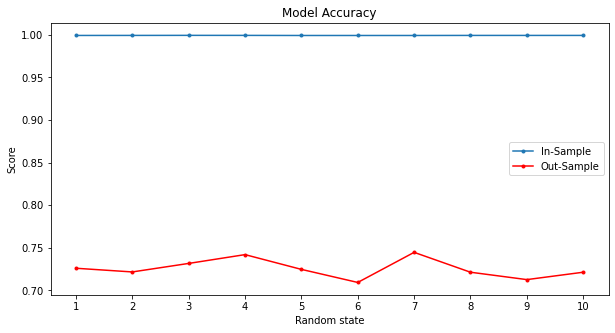

In [49]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), In, '.-')
plt.plot(range(1,11), Out, 'r.-')
plt.xlabel('Random state')
plt.ylabel('Score')
plt.legend(('In-Sample', 'Out-Sample'))
plt.xticks(range(1,11))
plt.title('Model Accuracy')
_=plt.show()

In [ ]:
steps=[('imputer', KNNImputer(n_neighbors=2, weights='uniform')), #imputing clearing missing data
      ('scaler', StandardScaler()), #scaling
      ('decision_tree', DecisionTreeClassifier())] #Decision Tree
pipeline=Pipeline(steps)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=i, stratify=y)
pipeline.fit(X_train, y_train)


In [75]:
#cross-validation with K-fold cv
cv_score1=cross_val_score(pipeline, X_train, y_train, cv=10, n_jobs=-1)
print([float('{:.4f}'.format(i)) for i in cv_score1])
print('Mean In-Sample: %.4f, std: %.4f' % (np.mean(cv_score1), np.std(cv_score1)))

[0.7263, 0.7359, 0.7289, 0.733, 0.7181, 0.7385, 0.7367, 0.7211, 0.723, 0.7244]
Mean In-Sample: 0.7286, std: 0.0068


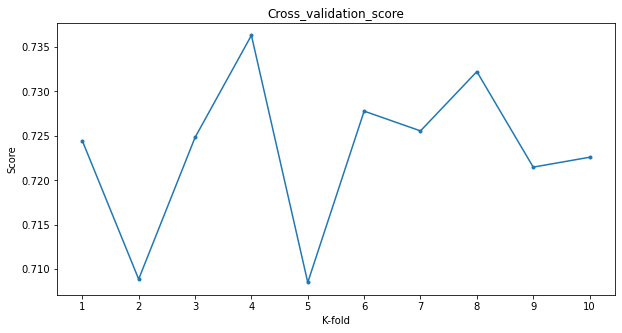

In [64]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), cv_score, '.-')
plt.xlabel('K-fold')
plt.ylabel('Score')
plt.xticks(range(1,11))
plt.title('Cross_validation_score')
_=plt.show()

In [76]:

#cross-validation with K-fold cv
cv_score2=cross_val_score(pipeline, X_test, y_test, cv=10, n_jobs=-1)
print([float('{:.4f}'.format(i)) for i in cv_score2])
print('Mean Out-Sample: %.4f, std: %.4f' % (np.mean(cv_score2), np.std(cv_score2)))

[0.73, 0.7267, 0.7067, 0.7067, 0.6933, 0.6833, 0.6967, 0.74, 0.7467, 0.7233]
Mean Out-Sample: 0.7153, std: 0.0200


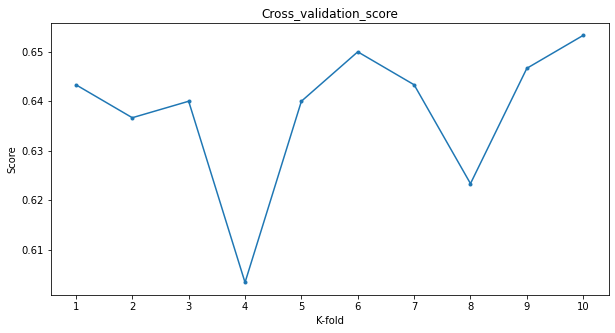

In [66]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), cv_score, '.-')
plt.xlabel('K-fold')
plt.ylabel('Score')
plt.xticks(range(1,11))
plt.title('Cross_validation_score')
_=plt.show()

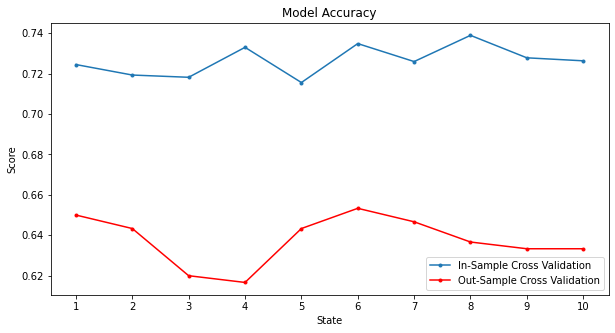

In [69]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), cv_score1, '.-')
plt.plot(range(1,11), cv_score2, 'r.-')
plt.xlabel('State')
plt.ylabel('Score')
plt.legend(('In-Sample Cross Validation', 'Out-Sample Cross Validation'))
plt.xticks(range(1,11))
plt.title('Model Accuracy')
_=plt.show()

In [60]:
%time

#GridSearchCV
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33, stratify=y)
parameters={
    'decision_tree__criterion':('gini', 'entropy'), 
    'decision_tree__splitter': ('best', 'random')   
}

cv=GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred=cv.predict(X_test)


print('Accuracy: %.4f' % cv.score(X_test, y_test))
#print classificatio report (y_test, y_pred)
print('Tuned Model Parameters: {}'.format(cv.best_params_))
%time

Wall time: 0 ns
Accuracy: 0.6633
Tuned Model Parameters: {'decision_tree__criterion': 'entropy', 'decision_tree__splitter': 'best'}
Wall time: 0 ns


In [77]:
print("My name is Aigerim")
print("My NetID is: aigerim4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Aigerim
My NetID is: aigerim4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
